In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df=pd.read_csv(r"C:\Users\Shavvy\OneDrive\Desktop\traindataset\train.csv")

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# predict whether passenger survive or not

In [89]:
#NaN-not a number - considered as a missing values in pandas

In [90]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
df.shape

(891, 12)

In [92]:
df.drop(['Cabin'],axis='columns',inplace=True) #can use 1 instead of column

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
round((df.Age.sum())/df.Age.count(),1)

29.7

# Concept of outlier

In [95]:
arr=np.array([1,2,3,4,5,6,7,8])

In [96]:
np.mean(arr)

4.5

In [97]:
np.median(arr)

4.5

C:\Users\Shavvy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

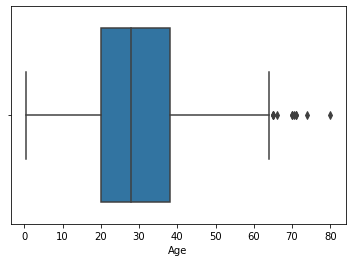

In [98]:
sns.boxplot(df['Age'])

In [99]:
np.mean(df['Age'])

29.69911764705882

In [176]:
np.median(df['Age'])

28.0

In [100]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
df.Age.fillna(28,inplace=True) # in case of outlier use median otherwise use mean , as mean is differentiable

In [102]:
# when you have categorical data use mode only

In [103]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
df.Embarked.fillna('S',inplace=True)

In [105]:
df.isna().sum()/891

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# Model

In [106]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
from sklearn import linear_model
logr=linear_model.LinearRegression()

In [107]:
from sklearn.model_selection import train_test_split

In [57]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [58]:
#Label Encoding for object datatype
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

In [59]:
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Embarked']=le.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,2
888,889,0,3,413,0,28.0,1,2,675,23.4500,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,0


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
col_list=[]
for col in df.columns:
    if (((df[col].dtype)!='object') & (col!='Survived')):
        col_list.append(col)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)


      features       VIF
0  PassengerId  3.724655
1       Pclass  9.481656
2         Name  3.804993
3          Sex  3.110965
4          Age  5.219878
5        SibSp  1.578828
6        Parch  1.620465
7       Ticket  4.521316
8         Fare  1.866803
9     Embarked  4.740680


In [63]:
df.drop(['Pclass'],axis=1,inplace=True)
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,108,1,22.0,1,0,523,7.2500,2
1,2,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,353,0,26.0,0,0,669,7.9250,2
3,4,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,15,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,548,1,27.0,0,0,101,13.0000,2
887,888,1,303,0,19.0,0,0,14,30.0000,2
888,889,0,413,0,28.0,1,2,675,23.4500,2
889,890,1,81,1,26.0,0,0,8,30.0000,0


In [64]:
col_list=[]
for col in df.columns:
    if (((df[col].dtype)!='object') & (col!='Survived')):
        col_list.append(col)

X=df[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
print(vif_data)

      features       VIF
0  PassengerId  3.480070
1         Name  3.519548
2          Sex  2.968271
3          Age  5.187943
4        SibSp  1.552647
5        Parch  1.582833
6       Ticket  3.375781
7         Fare  1.610408
8     Embarked  4.287745


In [65]:
df.drop(['Age'],axis=1,inplace=True)
df

,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,108,1,1,0,523,7.2500,2
1,2,1,190,0,1,0,596,71.2833,0
2,3,1,353,0,0,0,669,7.9250,2
3,4,1,272,0,1,0,49,53.1000,2
4,5,0,15,1,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,548,1,0,0,101,13.0000,2
887,888,1,303,0,0,0,14,30.0000,2
888,889,0,413,0,1,2,675,23.4500,2
889,890,1,81,1,0,0,8,30.0000,0


In [108]:
X=df.drop(['Survived'],axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [109]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
from sklearn import linear_model
logr=linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [111]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
dt.fit(x_train,y_train)

In [79]:
dt.score(x_test,y_test)

0.7430167597765364

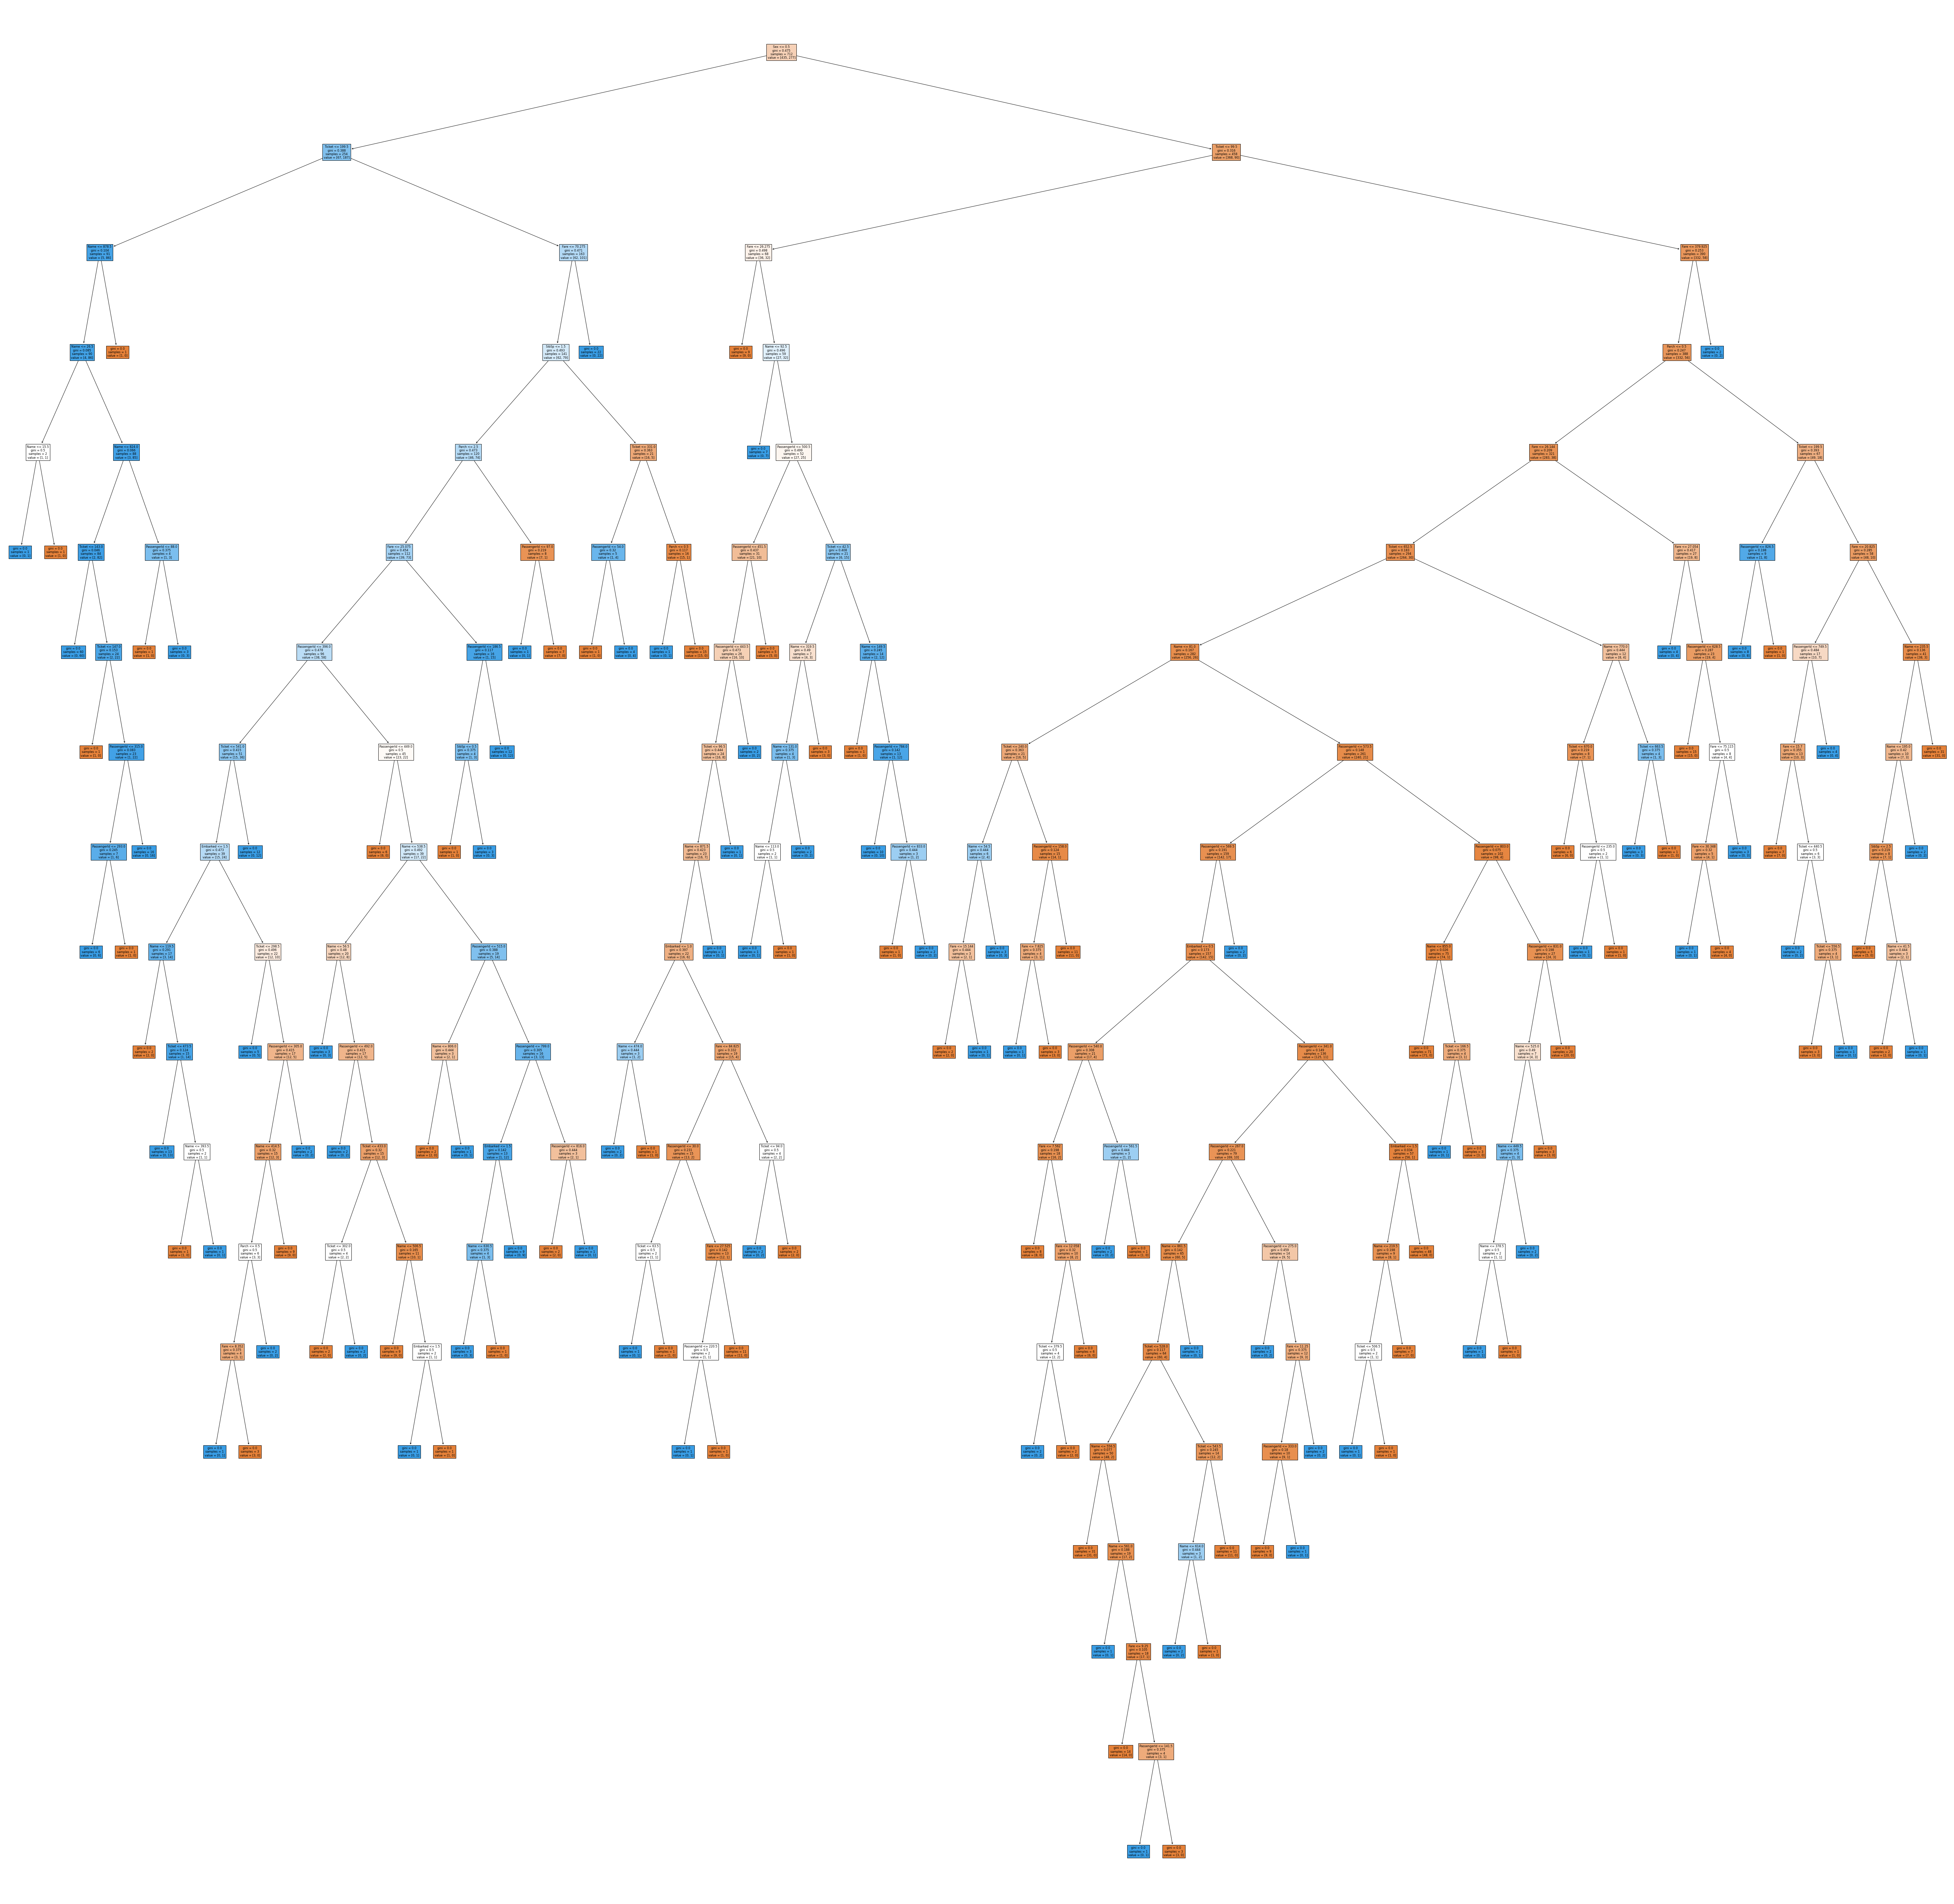

In [81]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,100))

tree.plot_tree(dt,feature_names=X.columns,filled=True)
plt.show()

In [82]:
logr.intercept_

0.9416601647216782

In [83]:
logr.coef_

array([ 2.62884784e-06, -9.72301073e-05, -5.18234558e-01, -3.99106578e-02,
       -3.32739711e-02, -3.74764211e-04,  1.74323731e-03, -4.60300413e-02])

In [84]:
y_pred=logr.predict(x_test)

In [85]:
r2_score(y_test,y_pred)

0.3180168641576431

# Main Model

In [121]:
X=df.drop(['Survived'],axis=1)
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [122]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
X.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [125]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [126]:
pd.get_dummies(X,drop_first=True)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,28.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [127]:
#Label Encoding for object datatype
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

In [130]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [132]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,0


In [148]:
X['Embarked']=le.fit_transform(X['Embarked'])
X['Sex']=le.fit_transform(X['Sex'])

In [149]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [150]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [151]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
from sklearn import linear_model
logr=linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [156]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [157]:
logr.fit(X_train,y_train)

LinearRegression()

In [158]:
logr.intercept_

1.328408500813837

In [159]:
logr.coef_

array([-1.64878769e-01, -5.13101047e-01, -6.55151274e-03, -5.00968930e-02,
       -9.59174494e-03,  4.31723776e-04, -2.66287279e-02])

In [169]:
y_pred=logr.predict(X_test)

In [170]:
r2_score(y_test,y_pred)

0.3267845434542045

In [174]:
dt.score(X_test,y_test)

0.7932960893854749

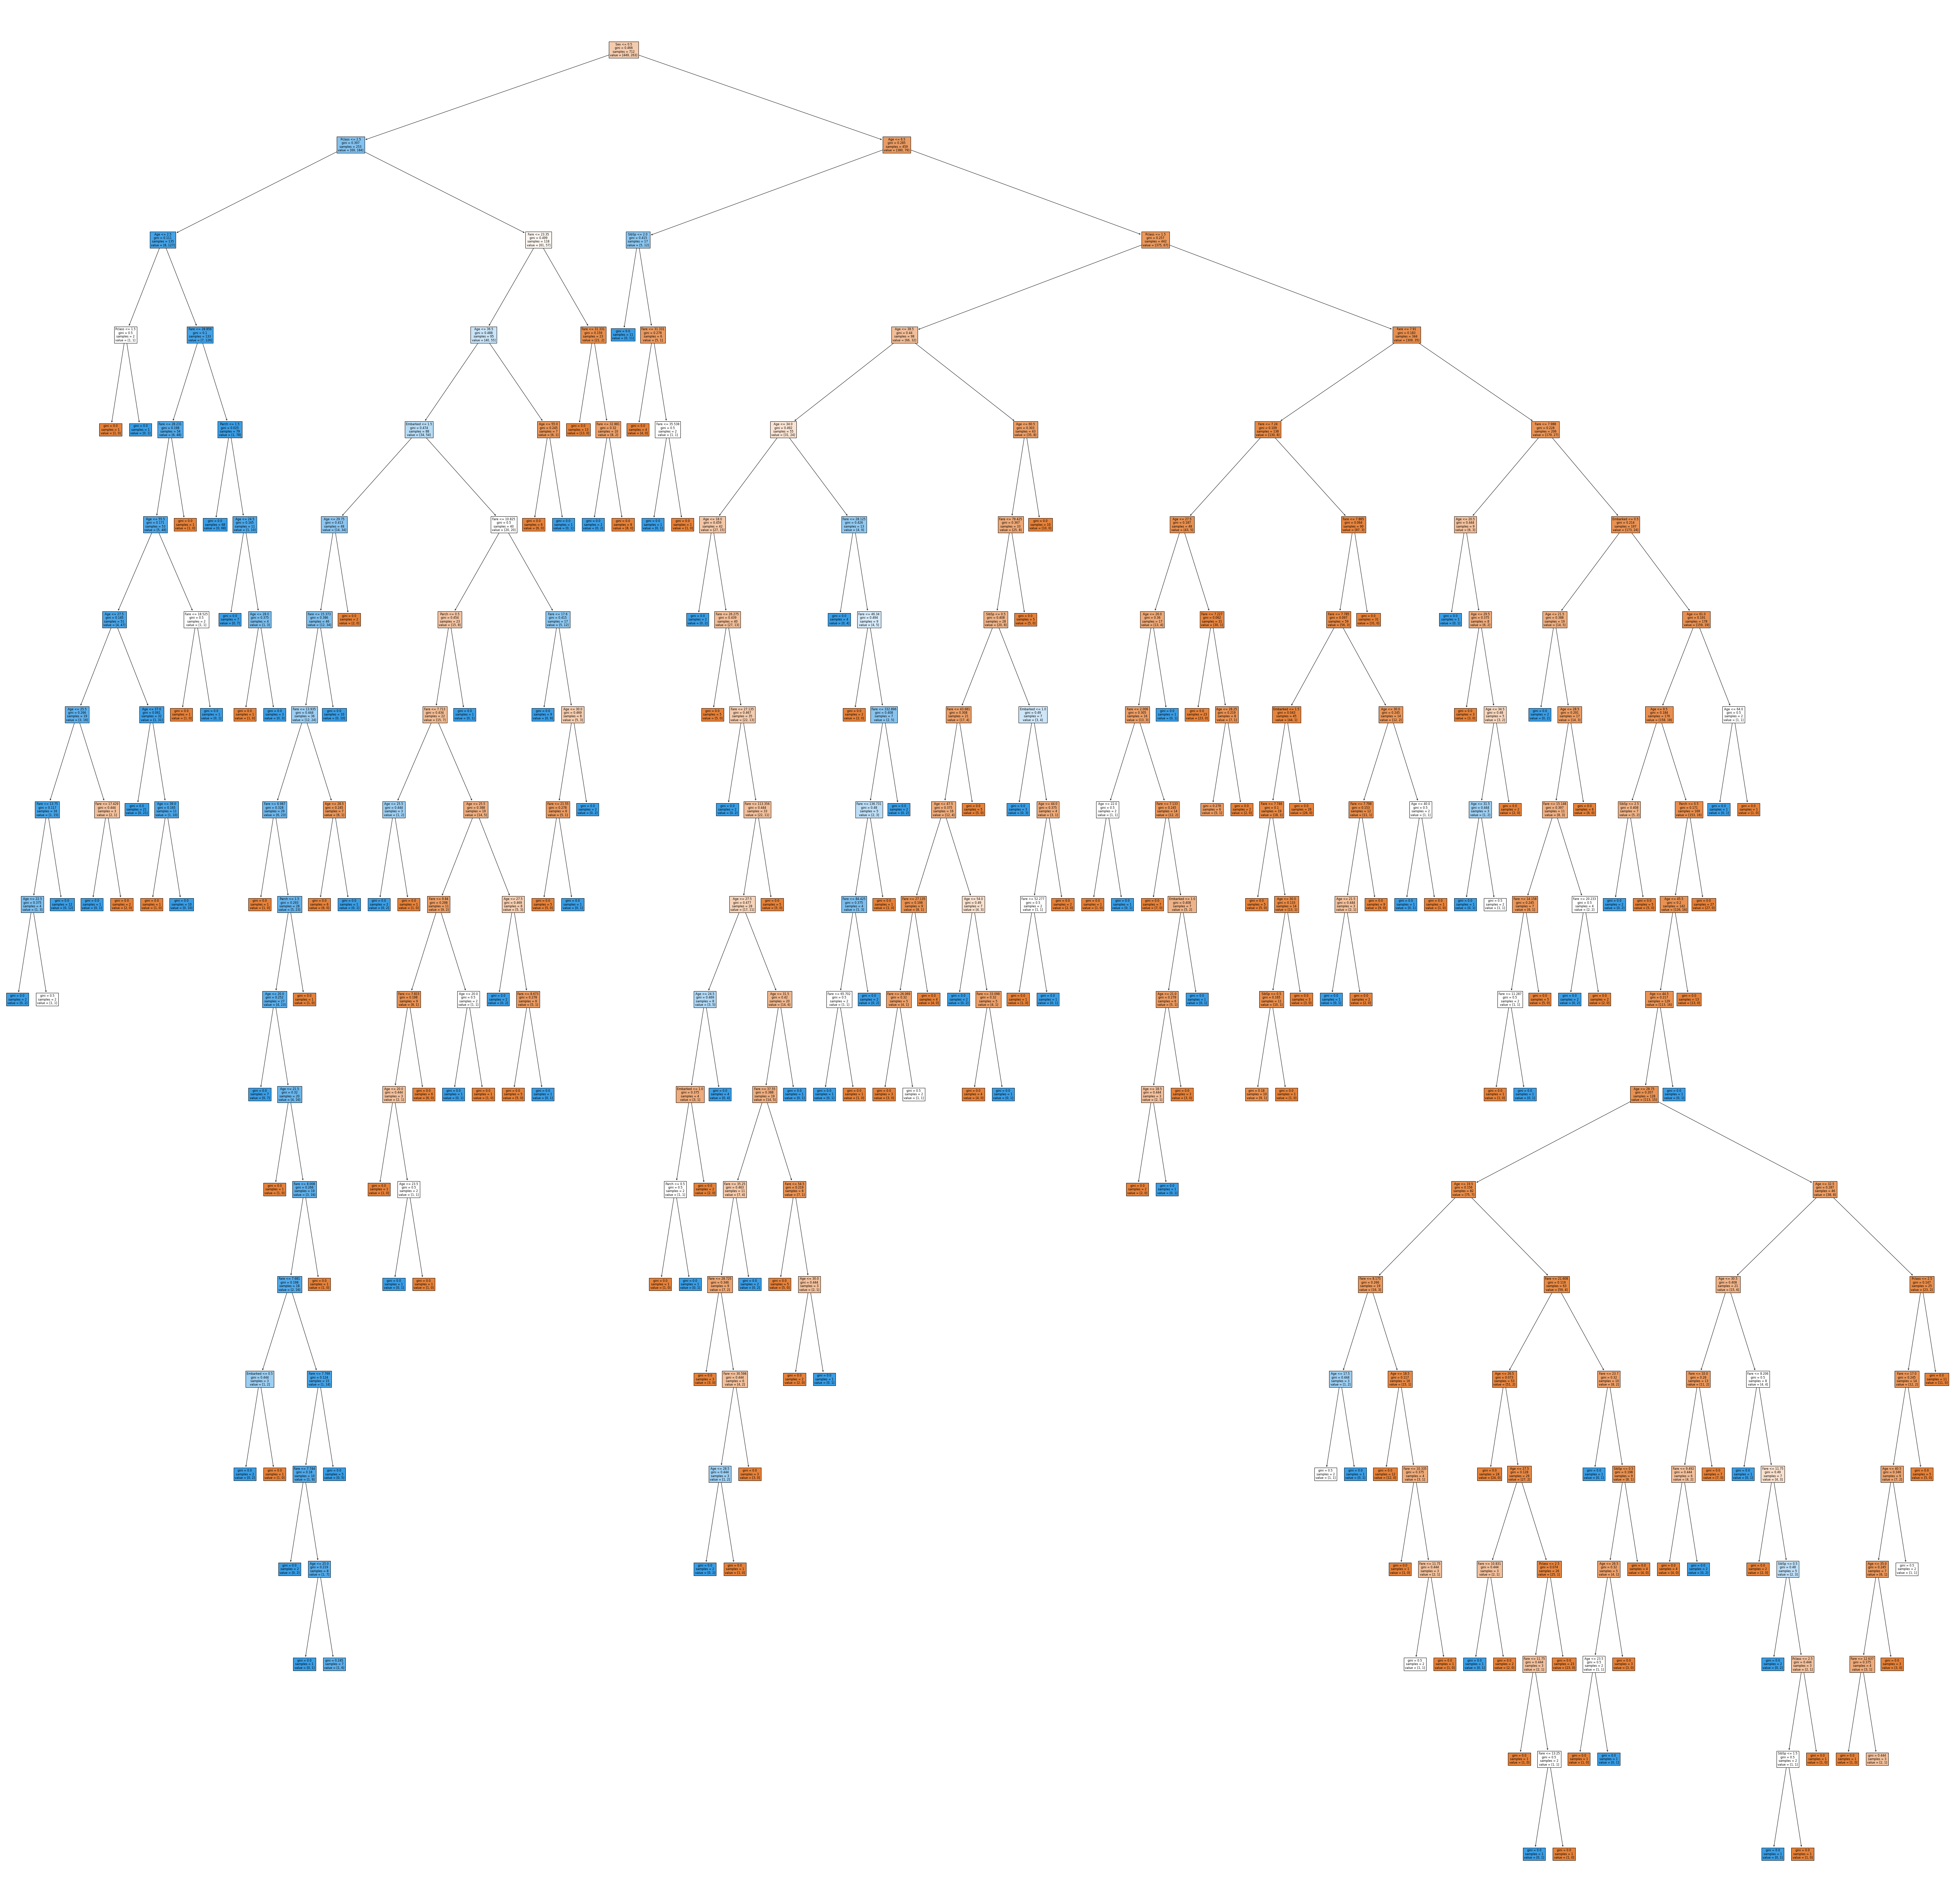

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>

In [308]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,100))

tree.plot_tree(dt,feature_names=X.columns,filled=True)
plt.show()
plt.savefig()

# Logistic Regression on titanic dataset

In [222]:
dataset=pd.read_csv(r"C:\Users\Shavvy\OneDrive\Desktop\traindataset\train.csv")

In [223]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [224]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

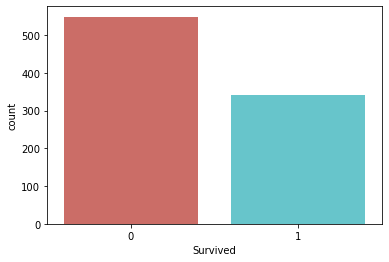

In [225]:
import seaborn as sns

sns.countplot(x= 'Survived',data = dataset, palette = 'hls')
plt.show()


In [226]:
X =dataset.drop(['Survived'],axis=1)
y = dataset['Survived']

In [227]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [228]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [229]:
X.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [230]:
#Label Encoding for object datatype
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()

In [231]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [232]:
X['Sex']=le.fit_transform(X['Sex'])

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [198]:
X


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,NaN,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [202]:
X['Age'].isna().sum()

177

In [207]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [233]:
np.mean(X['Age'])

29.69911764705882

In [235]:
X.Age.fillna(28,inplace=True)

In [239]:
X["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [242]:
X.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [243]:
X.Embarked.fillna('S',inplace=True)

In [245]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S
887,1,0,19.0,0,0,30.0000,S
888,3,0,28.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [246]:
X['Age'].isna().sum()

0

In [247]:
X['Embarked'].isna().sum()

0

In [248]:
X['Embarked']=le.fit_transform(X['Embarked'])

In [249]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [251]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_pred = logmodel.predict(X_test)

In [253]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))


Accuracy: %d 0.7988826815642458


In [254]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[[89 17]
 [19 54]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.76      0.74      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [260]:
logmodel.predict([[2,1,33,1,2,17,1]])

C:\Users\Shavvy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [270]:
prediction=logmodel.predict_proba(X)[:,-1]

In [271]:
names=dataset['Name']

In [272]:
predi_data=pd.DataFrame(prediction)

In [273]:
predi_data

,0
0,0.082783
1,0.913504
2,0.596108
3,0.885699
4,0.070704
...,...
886,0.250667
887,0.952714
888,0.510507
889,0.631069


In [274]:
names_data=pd.DataFrame(names)
names_data

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [275]:
pred_data_num=pd.DataFrame(logmodel.predict(X))

In [277]:
pred_data_num

,0
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,1


In [279]:
names_data["names"]=names_data

In [281]:
names_data.drop(['names'],axis=1,inplace=True)

In [283]:
names_data["predi_data"]=predi_data

In [284]:
names_data["pred_data_num"]=pred_data_num

In [285]:
names_data

,Name,predi_data,pred_data_num
0,"Braund, Mr. Owen Harris",0.082783,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.913504,1
2,"Heikkinen, Miss. Laina",0.596108,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.885699,1
4,"Allen, Mr. William Henry",0.070704,0
...,...,...,...
886,"Montvila, Rev. Juozas",0.250667,0
887,"Graham, Miss. Margaret Edith",0.952714,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.510507,1
889,"Behr, Mr. Karl Howell",0.631069,1


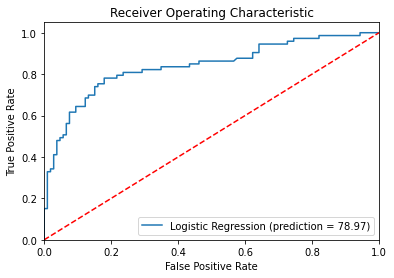

In [307]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
percentage=logit_roc_auc*100
plt.plot(fpr, tpr, label='Logistic Regression (prediction = %0.2f)' % percentage)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()